In [1]:
!pip install -q Control

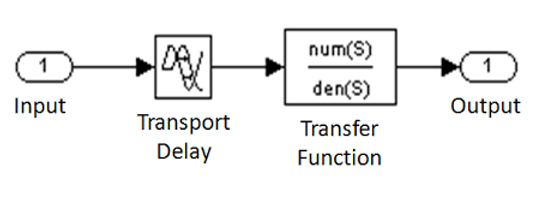

# Importando Bibliotecas

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import control

In [3]:
# Define transfer function of the system
s = control.tf('s')

# Criando uma Planta de Primeira Ordem com Tempo Morto

In [4]:
Kp = 1.7
Tau = 6.0
Delay = 1.5

In [5]:
sys  = Kp/(Tau*s + 1)
sys

TransferFunction(array([1.7]), array([6., 1.]))

In [6]:
num, den = control.pade(Delay, n=2, numdeg=0)
Pade = control.tf(num, den)
Pade

TransferFunction(array([0.88888889]), array([1.        , 1.33333333, 0.88888889]))

In [7]:
FOPDT = control.series(Pade, sys)
FOPDT

TransferFunction(array([1.51111111]), array([6.        , 9.        , 6.66666667, 0.88888889]))

#Definindo o Tempo total a ser simulado

In [8]:
Tinicial = 0
Tfinal = 20
NSteps = 1000 #Numero de Passos de Tempo na simulação

# Definir o vetor de tempo para a simulação
t = np.linspace(Tinicial, Tfinal, NSteps)

In [9]:
# Definir os tempos e amplitudes dos degraus
step_times = [0, 5, 10, 15]         # Momentos em que os degraus ocorrem
step_amplitudes = [1, -2, 3, -1]    # Amplitudes dos degraus
# Lembre-se que sempre trabalhamos com variáveis de desvio!!!

In [10]:
# Inicializar a entrada com zeros
u = np.zeros_like(t)

In [11]:
# Adicionar os degraus na entrada
for step_time, step_amplitude in zip(step_times, step_amplitudes):
    u[t >= step_time] += step_amplitude

In [12]:
# Simular a resposta do sistema
t, y = control.forced_response(FOPDT, t, u)

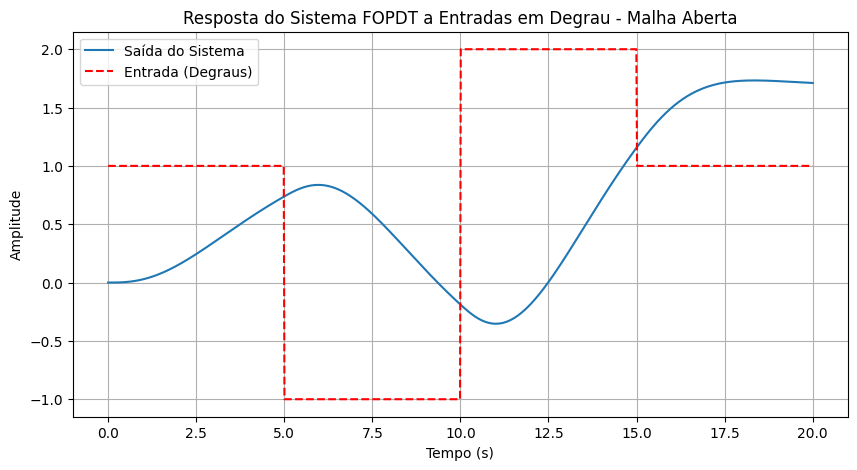

In [13]:
# Plotar a resposta do sistema
plt.figure(figsize=(10, 5))
plt.plot(t, y, label='Saída do Sistema')
plt.plot(t, u, 'r--', label='Entrada (Degraus)')
plt.xlabel('Tempo (s)')
plt.ylabel('Amplitude')
plt.title('Resposta do Sistema FOPDT a Entradas em Degrau - Malha Aberta')
plt.legend()
plt.grid(True)
plt.show()